In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [68]:
loanData = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
loanData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [69]:
loanData.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [70]:
loanData[loanData['Dependents'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [71]:
loanData.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [72]:
loanData.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [73]:
print(f"Unique vaiables: {loanData['Credit_History'].unique()} \n\ndtype of Credit_History: {loanData['Credit_History'].dtype}")

Unique vaiables: [ 1.  0. nan] 

dtype of Credit_History: float64


In [74]:
# Convert the Credit_History column to the object datatype
loanData['Credit_History'] = loanData['Credit_History'].astype('object')
loanData['Credit_History'].dtype

dtype('O')

In [75]:
# List of columns with missing values
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount', 'Dependents', 'Loan_Amount_Term', 'Gender', 'Married']
# Imputation loop
for col in null_cols:
    if loanData[col].dtype == 'object':
        # Impute categorical variables with mode
        mode_value = loanData[col].mode()[0]
        loanData[col].fillna(mode_value, inplace=True)
        print(f"Imputed {col} with mode: {mode_value}")
    else:
        # Impute numerical variables with mean for non-binary, and mode for binary
        mean_value = loanData[col].mean()
        loanData[col].fillna(mean_value, inplace=True)
        print(f"Imputed {col} with mean: {mean_value}")

Imputed Credit_History with mode: 1.0
Imputed Self_Employed with mode: No
Imputed LoanAmount with mean: 146.41216216216216
Imputed Dependents with mode: 0
Imputed Loan_Amount_Term with mean: 342.0
Imputed Gender with mode: Male
Imputed Married with mode: Yes


C:\Users\ayanr\AppData\Local\Temp\ipykernel_24656\75920107.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loanData[col].fillna(mode_value, inplace=True)
C:\Users\ayanr\AppData\Local\Temp\ipykernel_24656\75920107.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loanData[col].fillna(mode_value, inplace=Tr

In [76]:
loanData.isna().sum().sort_values(ascending=False)


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [77]:
loanData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


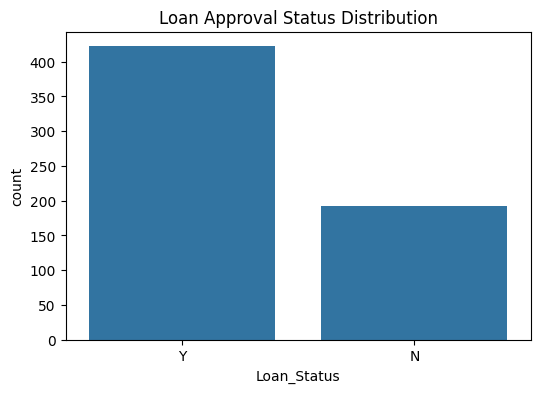

In [78]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=loanData)
plt.title('Loan Approval Status Distribution')
plt.show()

In [79]:
numerical = loanData.select_dtypes('number').columns.to_list()
categorical = loanData.select_dtypes('object').columns.to_list()

loan_num = loanData[numerical]
loan_cat = loanData[categorical]

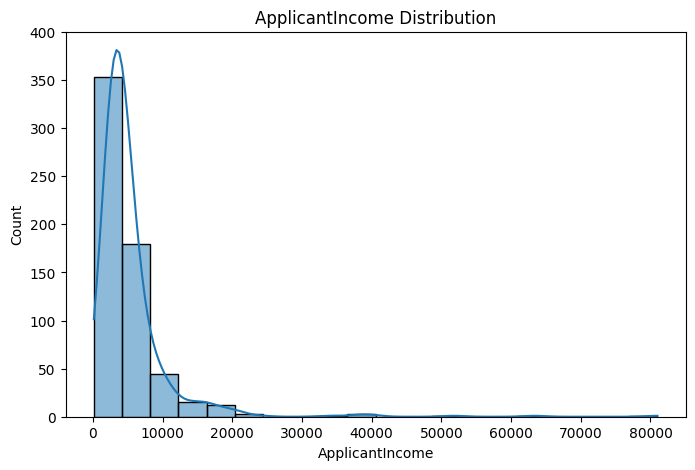

C:\Users\ayanr\AppData\Local\Temp\ipykernel_24656\3848581901.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=i, data=loanData, palette='Set3')


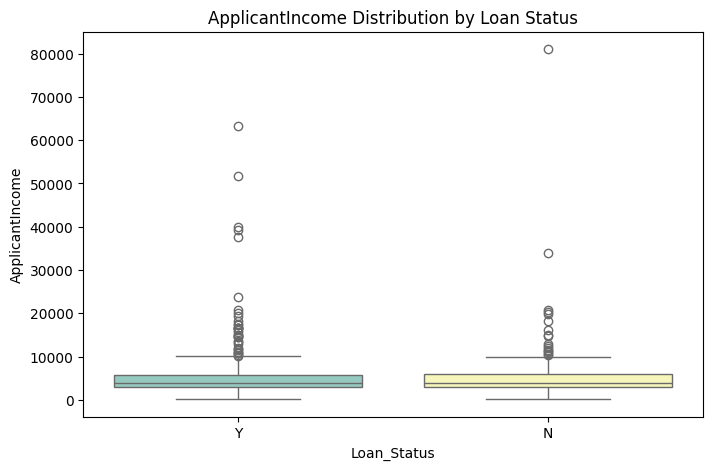

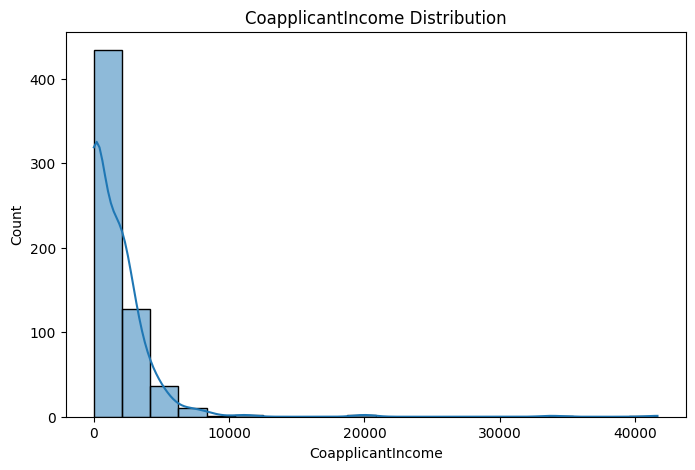

C:\Users\ayanr\AppData\Local\Temp\ipykernel_24656\3848581901.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=i, data=loanData, palette='Set3')


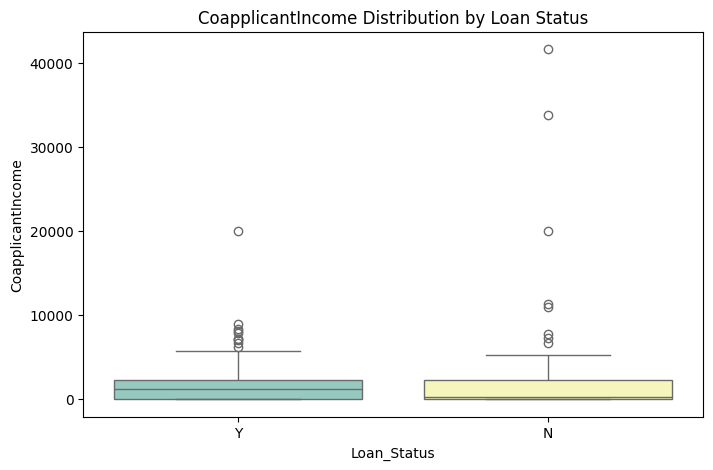

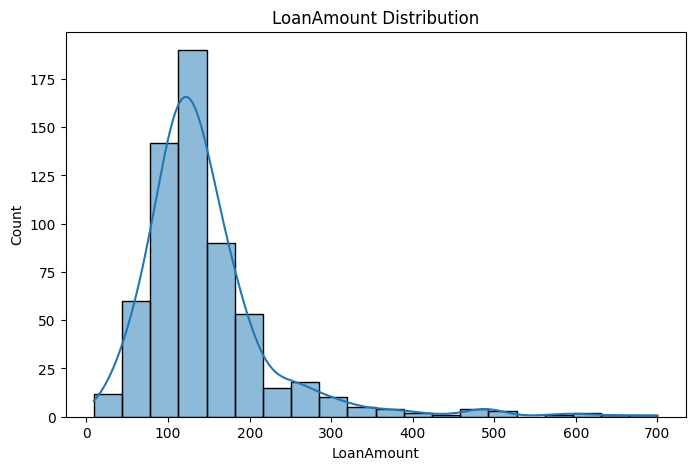

C:\Users\ayanr\AppData\Local\Temp\ipykernel_24656\3848581901.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=i, data=loanData, palette='Set3')


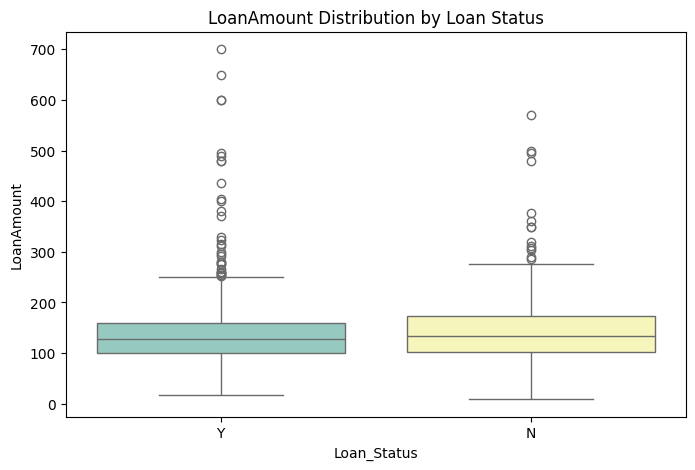

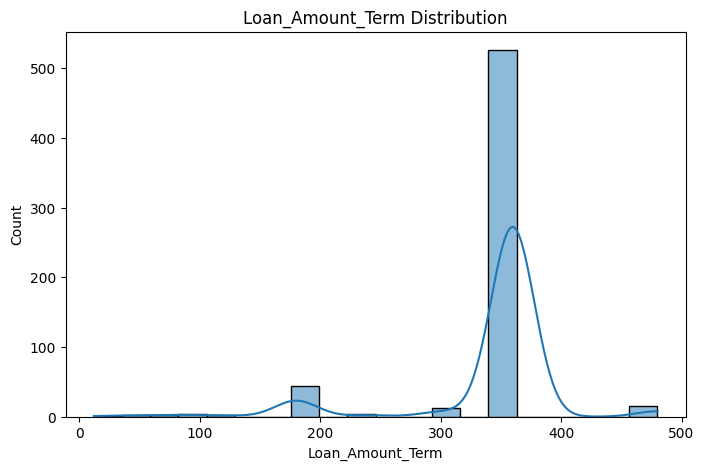

C:\Users\ayanr\AppData\Local\Temp\ipykernel_24656\3848581901.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=i, data=loanData, palette='Set3')


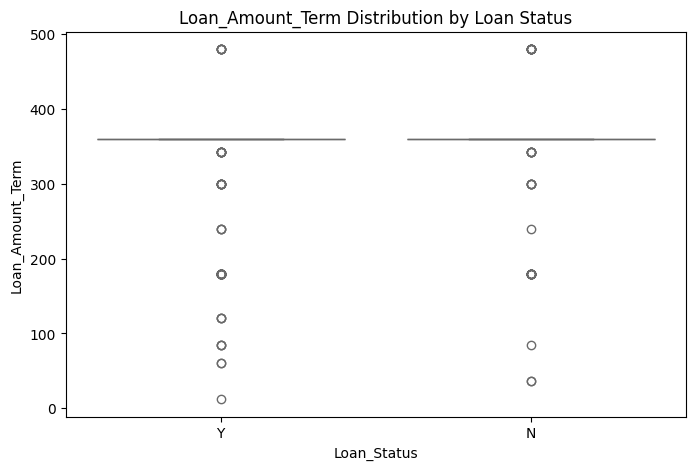

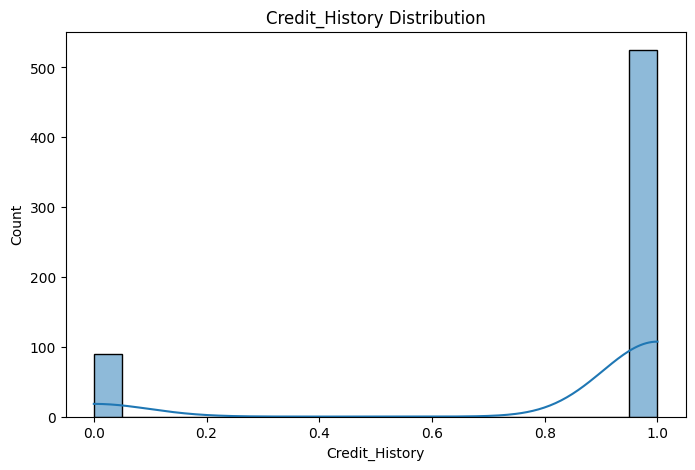

C:\Users\ayanr\AppData\Local\Temp\ipykernel_24656\3848581901.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Loan_Status', y=i, data=loanData, palette='Set3')


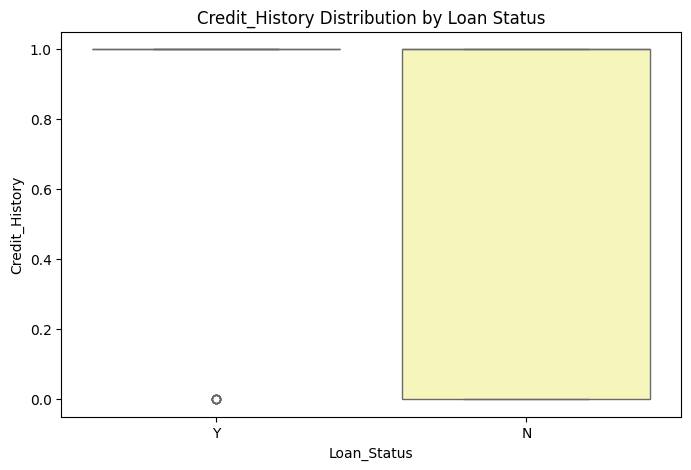

In [80]:
for i in loan_num:
    plt.figure(figsize=(8, 5))
    sns.histplot(loanData[i], bins=20, kde=True)
    plt.title(f'{i} Distribution')
    plt.show()

    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Loan_Status', y=i, data=loanData, palette='Set3')
    plt.title(f'{i} Distribution by Loan Status')
    plt.show()

In [81]:
loanData.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

C:\Users\ayanr\AppData\Local\Temp\ipykernel_24656\775094881.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loanData.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'Yes':1,'No':0},'Property_Area':{'Rural':0,'Urban':1,'Semiurban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)


In [82]:
loanData.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,Y


## Training

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [84]:
f=loanData.groupby("Gender").mean().plot(kind="bar",subplots=True,sharex=False,sharey=False,figsize=(15,10),layout=(2,5),alpha=0.7,title="According to Gender")
f= sns.set_style("darkgrid")
f=sns.set_context("paper")
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
loanData['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
loanData=loanData.replace(to_replace='3+',value=4)
loanData['Dependents'].value_counts()

0    360
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [ ]:
#Splitting the data and label
X=loanData.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=loanData['Loan_Status']

In [ ]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2,stratify=Y)

print(X.shape,X_test.shape,Y.shape,X_test.shape)

(614, 11) (62, 11) (614,) (62, 11)


In [ ]:
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

## Model Evaluation

In [ ]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score (X_train_prediction,Y_train)

In [ ]:
print('Accuracy score on training data : ',training_data_accuracy)

Accuracy score on training data :  0.8007246376811594


In [ ]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score (X_test_prediction,Y_test)

In [ ]:
print('Accuracy score on test data:',test_data_accuracy)

Accuracy score on test data: 0.8064516129032258


In [85]:
import pickle
classifier = svm.SVC(kernel='linear')
X_train_prediction = classifier.fit(X_train,Y_train)
pickle.dump(classifier.open('model.pkl','wb'))
model = pickle.load(open('model.pkl'),'rb')

























ValueError: could not convert string to float: '3+'